You will be acting as a consultant for a fictional real-estate investment firm. The firm has asked you what seems like a simple question:

> what are the top 5 best zipcodes for us to invest in?

Should your recommendation be focused on profit margins only? What about risk? What sort of time horizon are you predicting against?  Your recommendation will need to detail your rationale and answer any sort of lingering questions like these in order to demonstrate how you define "best". 

[Zillow Research Page](https://www.zillow.com/research/data/)

```zillow_data.csv```

The numbers in the csv are median estimated home values (?).

* A well-documented **_Jupyter Notebook_** containing any code you've written for this project 
* An **_'Executive Summary' PowerPoint Presentation_** that explains your rationale and methodology for determining the best zipcodes for investment.

#### Findings

Your notebook should briefly mention the metrics you have defined as "best", so that any readers understand what technical metrics you are trying to optimize for (for instance, risk vs profitability, ROI yield, etc.).

### Discussion with Francois
- Too many zipcodes?
- Build models based on multiple zipcodes?
- Narrow down region first and then zipcodes?
- When are the values missing? Only before 2014
- What are the numbers given anyway?

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from mod4project import *

In [4]:
df = pd.read_csv("zillow_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06   ...     2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0   ...     1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0   ...      308000   310000   312500   
2         3  210400.0  212200.0  212200.0   ...      321000   320600   320200   
3         4  498100.0  500900.0  503100.0   ...     1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0   ...      119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [7]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [8]:
find_na_in_df(df)

Metro 1043
1996-04 1039
1996-05 1039
1996-06 1039
1996-07 1039
1996-08 1039
1996-09 1039
1996-10 1039
1996-11 1039
1996-12 1039
1997-01 1039
1997-02 1039
1997-03 1039
1997-04 1039
1997-05 1039
1997-06 1039
1997-07 1038
1997-08 1038
1997-09 1038
1997-10 1038
1997-11 1038
1997-12 1038
1998-01 1036
1998-02 1036
1998-03 1036
1998-04 1036
1998-05 1036
1998-06 1036
1998-07 1036
1998-08 1036
1998-09 1036
1998-10 1036
1998-11 1036
1998-12 1036
1999-01 1036
1999-02 1036
1999-03 1036
1999-04 1036
1999-05 1036
1999-06 1036
1999-07 1036
1999-08 1036
1999-09 1036
1999-10 1036
1999-11 1036
1999-12 1036
2000-01 1036
2000-02 1036
2000-03 1036
2000-04 1036
2000-05 1036
2000-06 1036
2000-07 1036
2000-08 1036
2000-09 1036
2000-10 1036
2000-11 1036
2000-12 1036
2001-01 1036
2001-02 1036
2001-03 1036
2001-04 1036
2001-05 1036
2001-06 1036
2001-07 1036
2001-08 1036
2001-09 1036
2001-10 1036
2001-11 1036
2001-12 1036
2002-01 1036
2002-02 1036
2002-03 1036
2002-04 1036
2002-05 1036
2002-06 1036
2002-07 1036
2

In [9]:
df.dtypes

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
               ...   
2015-11         int64
2015-12         int64
2016-01         int64
2016-02         int64
2016-03         int64
2016-04         int64
2016-05         int64
2016-06         int64
2016-07         int64
2016-08         int64
2016-09         int64
2016-10         int64
2016-11         int64
2016-12         int64
2017-01   

In [10]:
df.dtypes[df.dtypes == object]

City          object
State         object
Metro         object
CountyName    object
dtype: object

In [11]:
df.iloc[0,:]

RegionID        84654
RegionName      60657
City          Chicago
State              IL
Metro         Chicago
CountyName       Cook
SizeRank            1
1996-04        334200
1996-05        335400
1996-06        336500
1996-07        337600
1996-08        338500
1996-09        339500
1996-10        340400
1996-11        341300
1996-12        342600
1997-01        344400
1997-02        345700
1997-03        346700
1997-04        347800
1997-05        349000
1997-06        350400
1997-07        352000
1997-08        353900
1997-09        356200
1997-10        358800
1997-11        361800
1997-12        365700
1998-01        370200
1998-02        374700
               ...   
2015-11        948200
2015-12        951000
2016-01        952500
2016-02        958600
2016-03        966200
2016-04        970400
2016-05        973900
2016-06        974700
2016-07        972600
2016-08        974300
2016-09        980800
2016-10        988000
2016-11        994700
2016-12        998700
2017-01   

In [12]:
find_duplicates_based_on_each_column(df)

RegionID 0
RegionName 0
City 7169
State 14672
Metro 14021
CountyName 13511
SizeRank 0
1996-04 12003
1996-05 12001
1996-06 11978
1996-07 11961
1996-08 12021
1996-09 11982
1996-10 11989
1996-11 11981
1996-12 11987
1997-01 11986
1997-02 11982
1997-03 11964
1997-04 11971
1997-05 11952
1997-06 11950
1997-07 11923
1997-08 11936
1997-09 11963
1997-10 11928
1997-11 11950
1997-12 11927
1998-01 11899
1998-02 11892
1998-03 11888
1998-04 11862
1998-05 11860
1998-06 11865
1998-07 11835
1998-08 11813
1998-09 11810
1998-10 11813
1998-11 11819
1998-12 11777
1999-01 11768
1999-02 11753
1999-03 11729
1999-04 11712
1999-05 11669
1999-06 11675
1999-07 11655
1999-08 11660
1999-09 11640
1999-10 11622
1999-11 11561
1999-12 11569
2000-01 11551
2000-02 11531
2000-03 11487
2000-04 11472
2000-05 11453
2000-06 11434
2000-07 11396
2000-08 11370
2000-09 11367
2000-10 11351
2000-11 11329
2000-12 11288
2001-01 11261
2001-02 11236
2001-03 11235
2001-04 11212
2001-05 11193
2001-06 11195
2001-07 11170
2001-08 11148
2001

In [13]:
new_df = convert_row_to_df(df, 0)

ValueError: could not convert string to float: 'Chicago'

In [ ]:
new_df.info()

In [ ]:
new_df['1998':]

In [ ]:
isinstance(new_df.index, pd.DatetimeIndex)

In [ ]:
next(df.iterrows())

In [ ]:
from mod4project import *

In [ ]:
df_dict = convert_rows_to_df_dict(df)

In [ ]:
list(df_dict.keys())[:10]

In [ ]:
df_dict[84654]

In [ ]:
df.columns[-5:]

In [ ]:
df_dict[84654].plot()

Things to investigate:
- Stationarity
- Transformations
    - Log/power
    - Differencing
    - Moving average
- Decomposition
- ACF/PACF
- SARIMAX models
- Prophet modeling

How to define the best zipcodes to invest in?
- Largest forecasted increases based on mean forecast
- Largest forecasted increases based on Z-score forecast
- A Pareto-optimal combination of these criteria

In [ ]:
from random import seed
from random import random
check_for_stationarity(ts)

In [60]:
%debug

> /Users/npschafer/anaconda/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py(397)lagmat()
    395     if xa.ndim == 1:
    396         xa = xa[:, None]
--> 397     nobs, nvar = xa.shape
    398     if original in ['ex', 'sep']:
    399         dropidx = nvar

ipdb> exit


In [64]:
ts = df_dict[84654]['prices'].values

In [67]:
check_for_stationarity(ts)

(-2.2980457599381943, 0.172599027513738)

In [70]:
from tqdm import tqdm

In [74]:
statistics, pvalues = [], []
for region_id, ts_df in tqdm(df_dict.items()):
    ts = ts_df['prices'].values
    statistic, pvalue = check_for_stationarity(ts)
    statistics.append(statistic)
    pvalues.append(pvalues)

100%|██████████| 14723/14723 [02:36<00:00, 93.86it/s] 


In [ ]:
plt.hist(pvalues)

In [ ]:
plt.hist(statistics)

In [14]:
len(df)

14723

In [16]:
df.columns[:7]

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank'],
      dtype='object')

How many zipcodes? Cities? States? Metros? Counties?

In [18]:
len(df['RegionName'].unique()) # num zipcodes

14723

In [19]:
len(df['City'].unique()) # num cities

7554

In [20]:
len(df['State'].unique()) # num states

51

In [25]:
df['State'].unique() # DC is denoted as a state

array(['IL', 'TX', 'NY', 'CA', 'FL', 'TN', 'NC', 'GA', 'DC', 'MO', 'OK',
       'AZ', 'NJ', 'MD', 'VA', 'WA', 'OH', 'MI', 'MA', 'KS', 'NM', 'CT',
       'NV', 'PA', 'CO', 'OR', 'IN', 'SC', 'KY', 'AR', 'ND', 'MN', 'AL',
       'DE', 'LA', 'MS', 'ID', 'MT', 'HI', 'WI', 'UT', 'ME', 'SD', 'WV',
       'IA', 'RI', 'NE', 'WY', 'AK', 'NH', 'VT'], dtype=object)

In [21]:
len(df['Metro'].unique()) # num metro areas

702

In [23]:
len(df['CountyName'].unique()) # num counties

1212

In [26]:
# Clustering the time series?

In [30]:
df.iloc[:,7:].T

0         1         2          3         4         5      \
1996-04   334200.0  235700.0  210400.0   498100.0   77300.0   95000.0   
1996-05   335400.0  236900.0  212200.0   500900.0   77300.0   95200.0   
1996-06   336500.0  236700.0  212200.0   503100.0   77300.0   95400.0   
1996-07   337600.0  235400.0  210700.0   504600.0   77300.0   95700.0   
1996-08   338500.0  233300.0  208300.0   505500.0   77400.0   95900.0   
1996-09   339500.0  230600.0  205500.0   505700.0   77500.0   96100.0   
1996-10   340400.0  227300.0  202500.0   505300.0   77600.0   96200.0   
1996-11   341300.0  223400.0  199800.0   504200.0   77700.0   96100.0   
1996-12   342600.0  219600.0  198300.0   503600.0   77700.0   96000.0   
1997-01   344400.0  215800.0  197300.0   503400.0   77800.0   95800.0   
1997-02   345700.0  211100.0  195400.0   502200.0   77900.0   95500.0   
1997-03   346700.0  205700.0  193000.0   500000.0   77900.0   95300.0   
1997-04   347800.0  200900.0  191800.0   497900.0   77800.0   95100.0   
1997-05   349000.0  196800.0  191800.0   496300.0   77800.0   95100.0   
1997-06   350400.0  193600.0  193000.0   495200.0   77800.0   95200.0   
1997-07   352000.0  191400.0  195200.0   494700.0   77800.0   95400.0   
1997-08   353900.0  190400.0  198400.0   494900.0   77800.0   95600.0   
1997-09   356200.0  190800.0  202800.0   496200.0   77900.0   95800.0   
1997-10   358800.0  192700.0  208000.0   498600.0   78100.0   96000.0   
1997-11   361800.0  196000.0  213800.0   502000.0   78200.0   96200.0   
1997-12   365700.0  201300.0  220700.0   507600.0   78400.0   96400.0   
1998-01   370200.0  207400.0  227500.0   514900.0   78600.0   96500.0   
1998-02   374700.0  212200.0  231800.0   522200.0   78800.0   96600.0   
1998-03   378900.0  214600.0  233400.0   529500.0   79000.0   96600.0   
1998-04   383500.0  215100.0  233900.0   537900.0   79100.0   96700.0   
1998-05   388300.0  213400.0  233500.0   546900.0   79200.0   96900.0   
1998-06   393300.0  210200.0  233300.0   556400.0   79300.0   97000.0   
1998-07   398500.0  206100.0  234300.0   566100.0   79300.0   97200.0   
1998-08   403800.0  202100.0  237400.0   575600.0   79300.0   97500.0   
1998-09   409100.0  198800.0  242800.0   584800.0   79400.0   97900.0   
...            ...       ...       ...        ...       ...       ...   
2015-11   948200.0  276400.0  324300.0  1218600.0  115800.0  147600.0   
2015-12   951000.0  277000.0  326100.0  1226600.0  116300.0  148500.0   
2016-01   952500.0  277900.0  327300.0  1230700.0  116200.0  149600.0   
2016-02   958600.0  280000.0  327000.0  1235400.0  115600.0  150600.0   
2016-03   966200.0  282600.0  327200.0  1241300.0  115000.0  151200.0   
2016-04   970400.0  285400.0  328500.0  1245700.0  114500.0  151800.0   
2016-05   973900.0  288400.0  329800.0  1247000.0  114200.0  153000.0   
2016-06   974700.0  290800.0  330000.0  1246700.0  114000.0  154400.0   
2016-07   972600.0  292000.0  329000.0  1245700.0  114000.0  155200.0   
2016-08   974300.0  292800.0  327800.0  1246000.0  113900.0  155500.0   
2016-09   980800.0  293700.0  326700.0  1247700.0  114100.0  155400.0   
2016-10   988000.0  295200.0  325500.0  1252900.0  114900.0  155000.0   
2016-11   994700.0  297000.0  324700.0  1260900.0  115700.0  155100.0   
2016-12   998700.0  299000.0  324500.0  1267900.0  116300.0  155900.0   
2017-01   997000.0  300800.0  323700.0  1272600.0  116900.0  156500.0   
2017-02   993700.0  301800.0  322300.0  1276600.0  117300.0  156900.0   
2017-03   991300.0  302800.0  320700.0  1280300.0  117600.0  157300.0   
2017-04   989200.0  304400.0  320000.0  1282500.0  118000.0  157600.0   
2017-05   991300.0  306200.0  320000.0  1286000.0  118600.0  157700.0   
2017-06   999100.0  307000.0  320900.0  1289000.0  118900.0  157700.0   
2017-07  1005500.0  308000.0  321000.0  1289800.0  119100.0  157900.0   
2017-08  1007500.0  310000.0  320600.0  1287700.0  119400.0  158700.0   
2017-09  1007800.0  312500.0  320200.0  1287400.0  120000.0  160200.0  

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df.iloc[:,7:].T.dropna(how='any'))

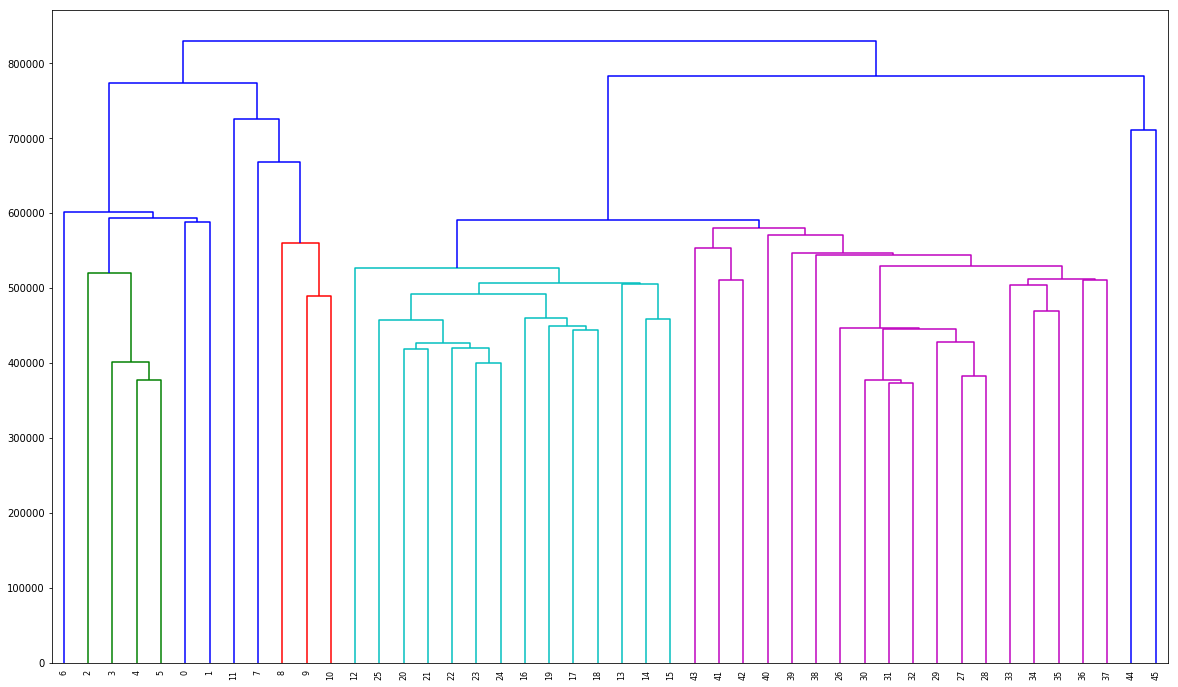

In [37]:
plt.figure(figsize=(20,12))
d = dendrogram(Z, leaf_rotation=90, leaf_font_size=8)

In [48]:
price_data = df.iloc[:,7:].T
price_data.index = pd.to_datetime(price_data.index)
price_data.columns = df['RegionName']
no_na_price_data = price_data.dropna(how='any')

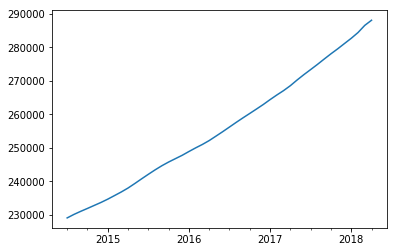

In [52]:
no_na_price_data.mean(axis=1).plot()

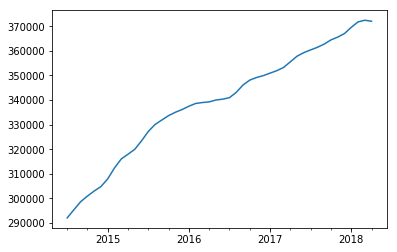

In [54]:
no_na_price_data.std(axis=1).plot()

How many zipcodes? Cities? States? Metros? Counties?

In [18]:
len(df['RegionName'].unique()) # num zipcodes

14723

In [19]:
len(df['City'].unique()) # num cities

7554

In [20]:
len(df['State'].unique()) # num states

51

In [25]:
df['State'].unique() # DC is denoted as a state

array(['IL', 'TX', 'NY', 'CA', 'FL', 'TN', 'NC', 'GA', 'DC', 'MO', 'OK',
       'AZ', 'NJ', 'MD', 'VA', 'WA', 'OH', 'MI', 'MA', 'KS', 'NM', 'CT',
       'NV', 'PA', 'CO', 'OR', 'IN', 'SC', 'KY', 'AR', 'ND', 'MN', 'AL',
       'DE', 'LA', 'MS', 'ID', 'MT', 'HI', 'WI', 'UT', 'ME', 'SD', 'WV',
       'IA', 'RI', 'NE', 'WY', 'AK', 'NH', 'VT'], dtype=object)

In [21]:
len(df['Metro'].unique()) # num metro areas

702

In [23]:
len(df['CountyName'].unique()) # num counties

1212

Hierarchical representation:
- Country: 1
- State: 51
- Metro: 702
- County: 1212
- City: 7554
- Zipcode: 14723

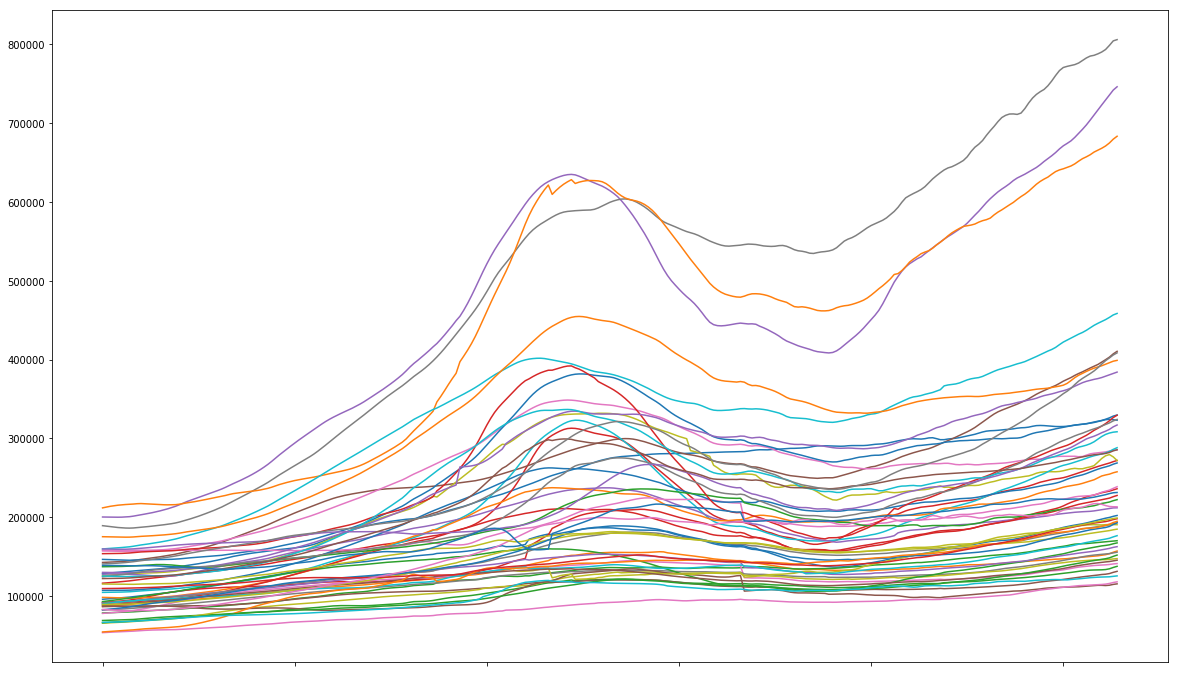

In [66]:
df.groupby('State').mean().iloc[:,3:].T.plot(legend=False, figsize=(20,12))

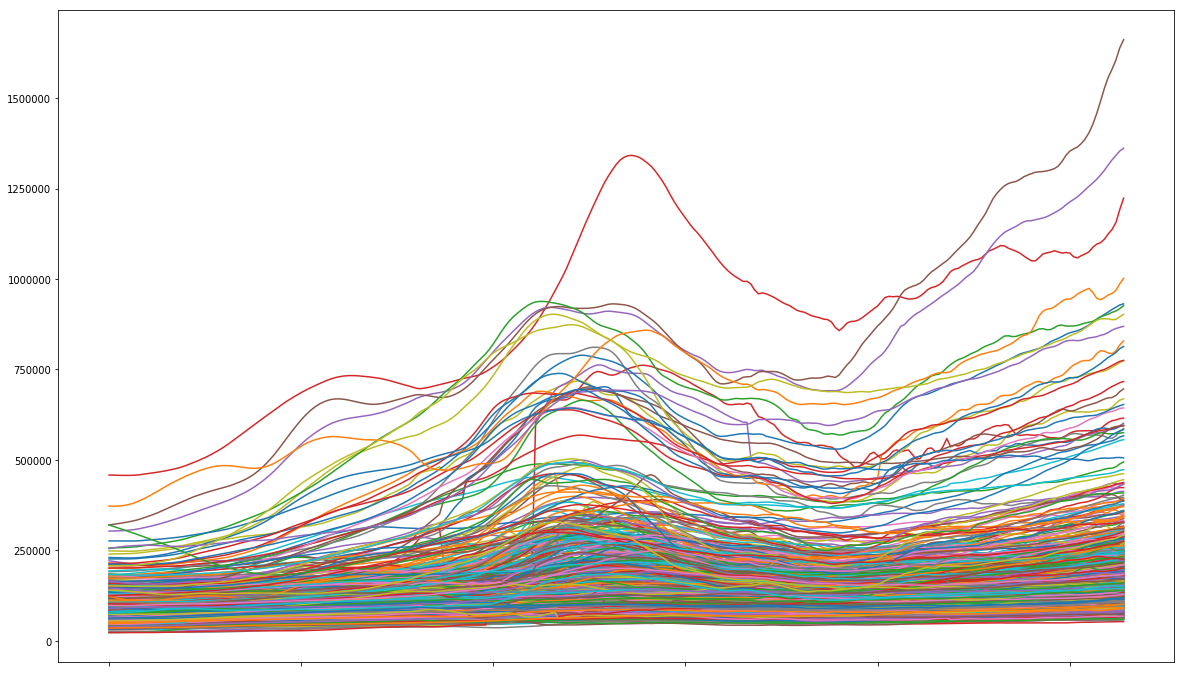

In [67]:
df.groupby('Metro').mean().iloc[:,3:].T.plot(legend=False, figsize=(20,12))

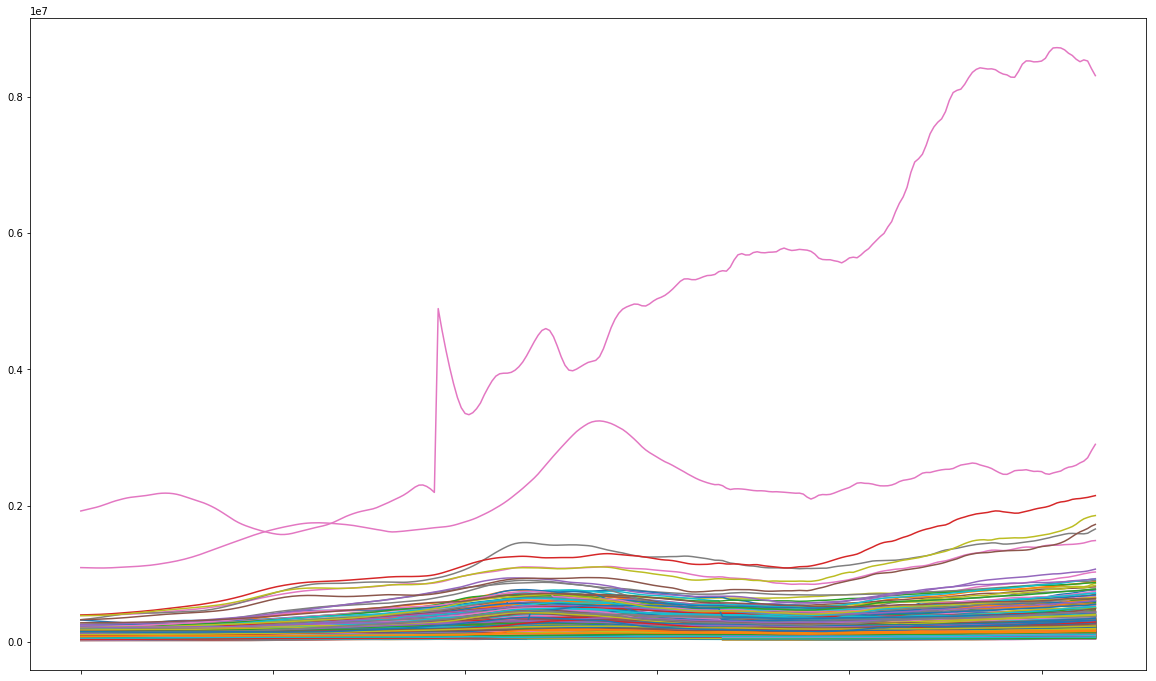

In [69]:
df.groupby('CountyName').mean().iloc[:,3:].T.plot(legend=False, figsize=(20,12))

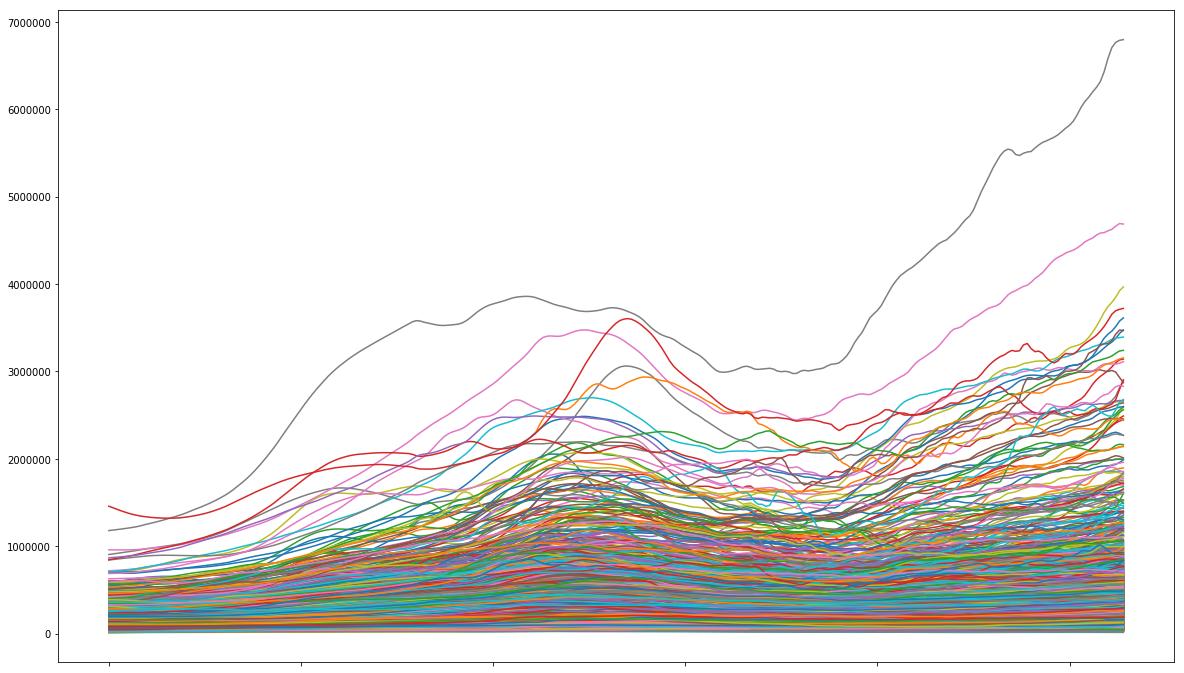

In [68]:
df.groupby('City').mean().iloc[:,3:].T.plot(legend=False, figsize=(20,12))

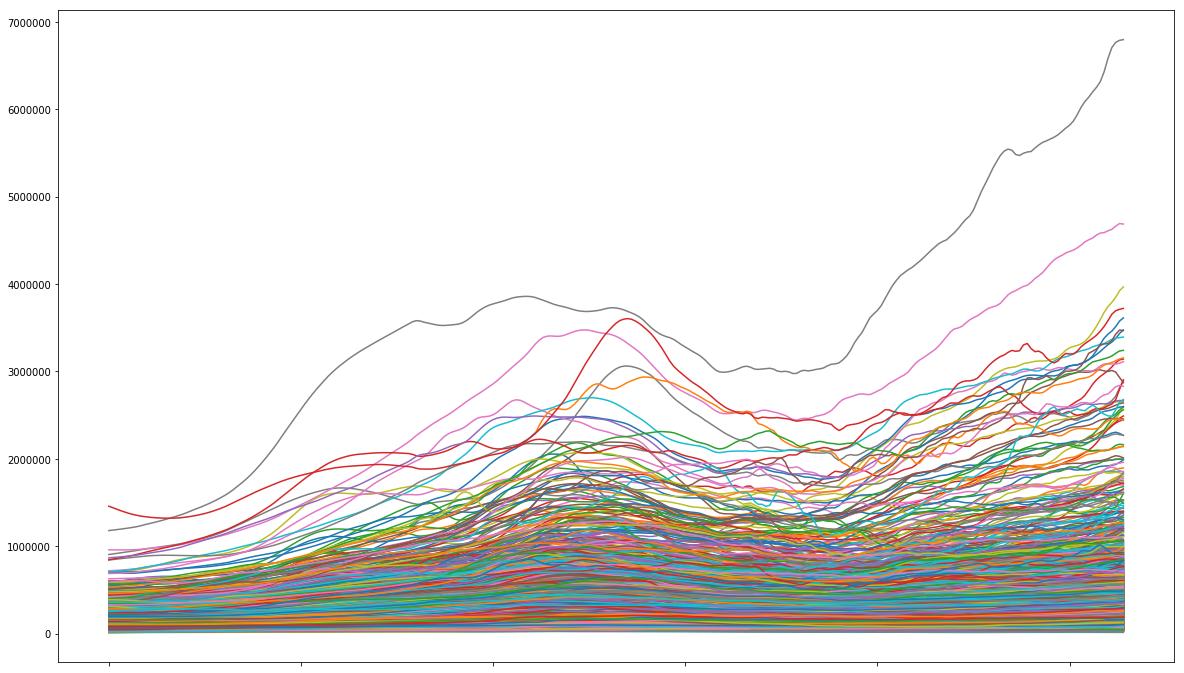

In [68]:
df.groupby('City').mean().iloc[:,3:].T.plot(legend=False, figsize=(20,12))

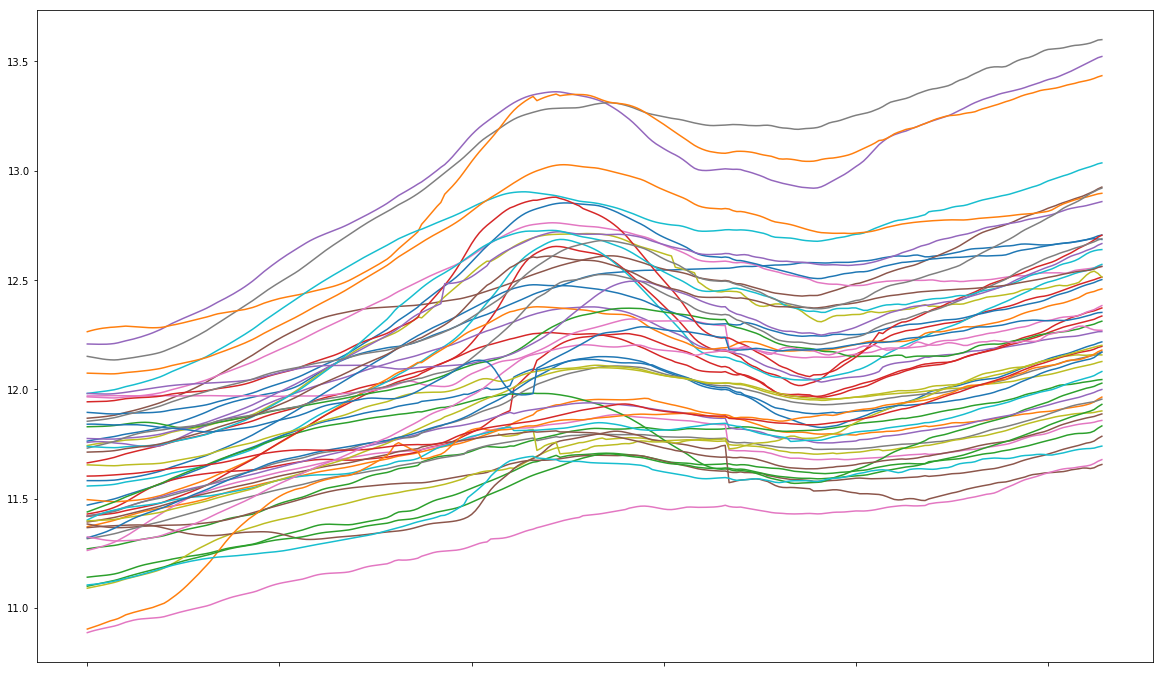

In [80]:
df.groupby('State').mean().transform(lambda x: np.log(x)).iloc[:,3:].T.plot(legend=False, figsize=(20,12))

In [ ]:
df.groupby('State').mean().transform(lambda x: np.log(x)).iloc[:,3:].T.plot(legend=False, figsize=(20,12))

In [82]:
df["Country"] = ["USA"]*len(df)

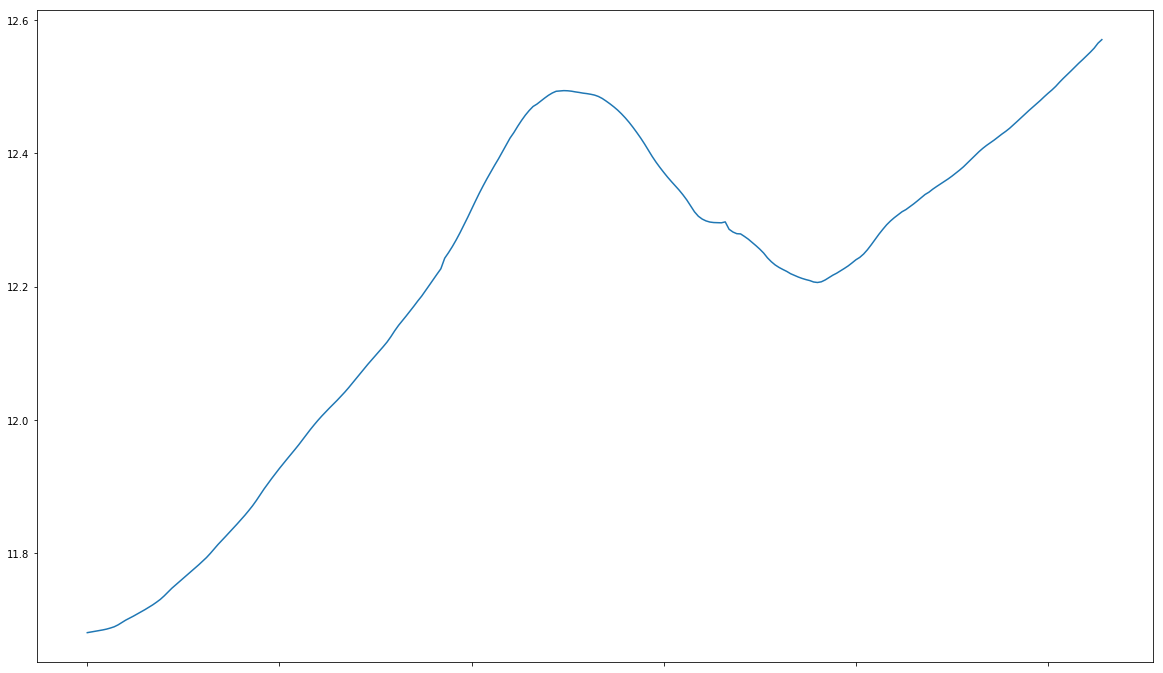

In [83]:
df.groupby('Country').mean().transform(lambda x: np.log(x)).iloc[:,3:].T.plot(legend=False, figsize=(20,12))

Hierarchical representation:
- Country: 1
- State: 51
- Metro: 702
- County: 1212
- City: 7554
- Zipcode: 14723

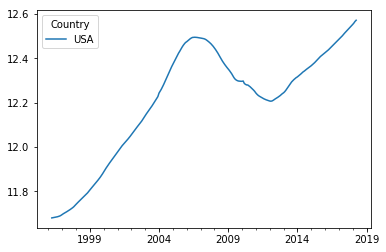

In [86]:
ts = df.groupby('Country').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)
ts.plot()

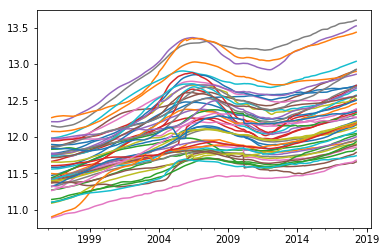

In [88]:
ts = df.groupby('State').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)
ts.plot(legend=False)

In [90]:
ts = df.groupby('Country').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)


In [124]:
X = ts['2014':].index - ts['2014':].index[0]
X = np.array([x.days for x in X]).reshape(-1,1)
y = ts['2014':].index.reshape(-1,1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [107]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.9974462603394085
[[0.00016316]]
[12.3090453]


In [111]:
X.shape

(52, 1)

In [119]:
X_with_constant = sm.add_constant(X)

In [120]:
import statsmodels.api as sm
ols = sm.OLS(y, X_with_constant)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
print(ols_result.HC0_se)
# and covariance estimates
print(ols_result.cov_HC0)

const    0.001183
x1       0.000001
dtype: float64
[[ 1.39997370e-06 -1.52898343e-09]
 [-1.52898343e-09  2.07050922e-12]]


In [121]:
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    USA   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.953e+04
Date:                Mon, 17 Jun 2019   Prob (F-statistic):           1.70e-66
Time:                        13:42:10   Log-Likelihood:                 216.37
No. Observations:                  52   AIC:                            -428.7
Df Residuals:                      50   BIC:                            -424.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3090      0.001   1.17e+04      0.000      12.307      12.311
x1             0.0002   1.17e-06    139.747      0.000       0.000       0.000
==============================================================================
Omnibus:                        5.814   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                4.697
Skew:                           0.626   Prob(JB):                       0.0955
Kurtosis:                       2.225   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Set confidence threshold
- Look for highest "significant" m-values
- Look for zipcodes that have good indicators at multiple levels in the hierarchy (?)

In [122]:
ols_result.rsquared

0.9974462603394085

In [125]:
ts = df.groupby('Country').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)

In [127]:
X = ts[year:].index - ts[year:].index[0]
X = np.array([x.days for x in X]).reshape(-1,1)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [132]:
ts = df.groupby('Country').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)

year_range = range(1995,2019)

rsqs = []
for year in year_range:
    year = str(year)
    
    X = ts[year:].index - ts[year:].index[0]
    X = np.array([x.days for x in X]).reshape(-1,1)
    X_with_constant = sm.add_constant(X)
    
    y = ts[year:][ts.columns[0]].values.reshape(-1,1)
    
    ols = sm.OLS(y, X_with_constant)
    ols_result = ols.fit()
    
    rsqs.append(ols_result.rsquared)

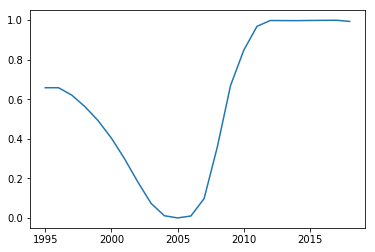

In [137]:
plt.plot(year_range, np.array(rsqs))

(2012, 2019)

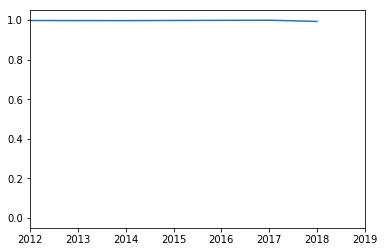

In [139]:
plt.plot(year_range, np.array(rsqs))
plt.xlim([2012,2019])

In [141]:
ts = df.groupby('State').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)

In [147]:
ts['AK'].head()

1996-04-01    11.762767
1996-05-01    11.766266
1996-06-01    11.769531
1996-07-01    11.772511
1996-08-01    11.775509
Name: AK, dtype: float64

In [146]:
state_names = list(df['State'].unique())

In [151]:
ts = df.groupby('State').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)

year_range = range(1995,2019)

rsqs = {}
for state in state_names:
    state_ts = ts[state]
    rsqs[state] = []
    for year in year_range:
        
        year = str(year)

        X = state_ts[year:].index - state_ts[year:].index[0]
        X = np.array([x.days for x in X]).reshape(-1,1)
        X_with_constant = sm.add_constant(X)

        y = state_ts[year:].values.reshape(-1,1)

        ols = sm.OLS(y, X_with_constant)
        ols_result = ols.fit()

        rsqs[state].append(ols_result.rsquared)

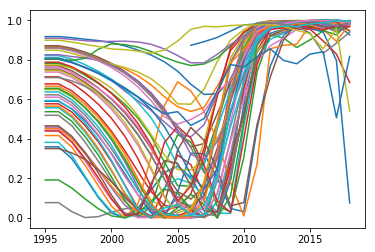

In [153]:
for state in state_names:
    plt.plot(year_range, rsqs[state])

In [156]:
ols_result.pvalues[1]

0.09639903574242051

In [157]:
zipcodes = list(df['RegionName'].unique())

In [ ]:
ts = df.groupby('RegionName').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)

starting

rsqs = {}
for zipcode in zipcodes:
    zip_ts = ts[zipcode]
    rsqs[zipcode] = []
    for year in year_range:
        
        year = str(year)

        X = state_ts[year:].index - state_ts[year:].index[0]
        X = np.array([x.days for x in X]).reshape(-1,1)
        X_with_constant = sm.add_constant(X)

        y = state_ts[year:].values.reshape(-1,1)

        ols = sm.OLS(y, X_with_constant)
        ols_result = ols.fit()

        rsqs[state].append(ols_result.rsquared)

detrend by hierarchy, fit to log-linear model, forecast, check slope and significance

Hierarchical representation:
- Country: 1
- State: 51
- Metro: 702
- County: 1212
- City: 7554
- Zipcode: 14723

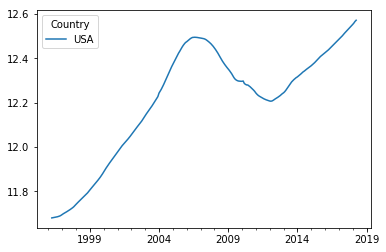

In [86]:
ts = df.groupby('Country').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)
ts.plot()

(Zipcode - (City - (County - (Metro - (State - Country)))))

Detrend by country, check linearity of zip codes

Detrend by state and country, check linearity

In [158]:
ts = df.groupby('Country').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)
country_mean = ts

In [160]:
ts = df.groupby('State').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)
state_mean = ts

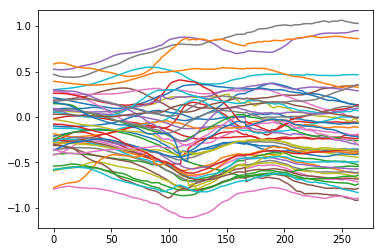

In [166]:
_ = plt.plot(state_mean.values - country_mean.values)

In [168]:
ts = df.groupby('Country').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)
country_mean = ts
country_mean = country_mean['2012':]

In [169]:
ts = df.groupby('State').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)
state_mean = ts
state_mean = state_mean['2012':]

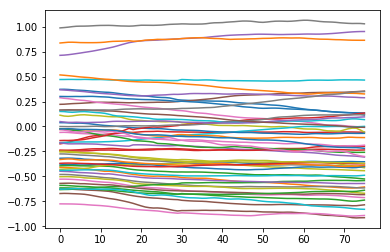

In [172]:
_ = plt.plot(state_mean.values - country_mean.values)

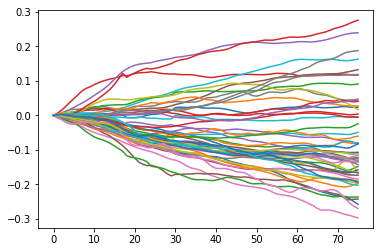

In [176]:
_ = plt.plot(state_mean.values - state_mean.values[0] - country_mean.values + country_mean.values[0])

Choose states that have a significantly positive slope

Examine the other levels of the hierarchy in a similar manner

In [177]:
ts = df.groupby('Metro').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)
metro_mean = ts['2012':]

In [178]:
_ = plt.plot(
             state_mean.values - state_mean.values[0] -
             country_mean.values + country_mean.values[0])

Metro        Aberdeen    Abilene        Ada     Adrian      Akron  Alamogordo  \
2012-01-01  11.779205  11.375647  11.072351  11.385319  11.717145   11.481435   
2012-02-01  11.783944  11.375125  11.087768  11.381677  11.716043   11.472103   
2012-03-01  11.756577  11.375751  11.098420  11.389175  11.721257   11.464785   
2012-04-01  11.719777  11.378355  11.097410  11.412663  11.727623   11.456355   
2012-05-01  11.704207  11.380432  11.090314  11.433882  11.730627   11.449986   
2012-06-01  11.694247  11.380225  11.085215  11.442074  11.731692   11.446786   
2012-07-01  11.687131  11.379913  11.080089  11.477169  11.732517   11.446786   
2012-08-01  11.692994  11.382195  11.077516  11.486196  11.732864   11.444647   
2012-09-01  11.702719  11.385918  11.081116  11.496669  11.733102   11.439279   
2012-10-01  11.718394  11.390141  11.085726  11.509168  11.733579   11.438202   
2012-11-01  11.738466  11.394142  11.090823  11.521513  11.736285   11.448920   
2012-12-01  11.749735  11.399146  11.087258  11.531134  11.740750   11.460579   
2013-01-01  11.745940  11.406049  11.071833  11.536520  11.744037   11.466882   
2013-02-01  11.733506  11.412502  11.053532  11.538593  11.744423   11.468974   
2013-03-01  11.713987  11.415814  11.045053  11.537374  11.743844   11.467928   
2013-04-01  11.700317  11.417915  11.045585  11.534198  11.744273   11.472103   
2013-05-01  11.702223  11.420012  11.058795  11.531747  11.745966   11.477298   
2013-06-01  11.731981  11.423697  11.074937  11.529291  11.749321   11.482466   
2013-07-01  11.767568  11.427070  11.085726  11.532238  11.750707   11.486581   
2013-08-01  11.773056  11.426773  11.093361  11.542120  11.751240   11.486581   
2013-09-01  11.757987  11.423896  11.095894  11.553827  11.754281   11.487608   
2013-10-01  11.734468  11.421508  11.093868  11.562192  11.757227   11.485554   
2013-11-01  11.719533  11.422901  11.092854  11.570132  11.756507   11.483497   
2013-12-01  11.710382  11.426377  11.099428  11.572255  11.756889   11.479369   
2014-01-01  11.715785  11.428555  11.107460  11.570132  11.755329   11.474185   
2014-02-01  11.723753  11.431222  11.108460  11.570605  11.758121   11.472103   
2014-03-01  11.757752  11.435455  11.105959  11.574138  11.757238   11.471061   
2014-04-01  11.788889  11.439866  11.108460  11.578830  11.758061   11.461632   
2014-05-01  11.798180  11.444452  11.110954  11.589308  11.763544   11.457413   
2014-06-01  11.793658  11.450276  11.108460  11.603337  11.769950   11.456355   
...               ...        ...        ...        ...        ...         ...   
2015-11-01  11.838842  11.527097  11.123334  11.677498  11.822595   11.495779   
2015-12-01  11.853461  11.528441  11.126773  11.685103  11.824700   11.495779   
2016-01-01  11.863441  11.530855  11.133128  11.693764  11.826088   11.496796   
2016-02-01  11.869410  11.535576  11.138959  11.701800  11.826594   11.493743   
2016-03-01  11.868640  11.543895  11.142828  11.705014  11.826556   11.488633   
2016-04-01  11.868920  11.553457  11.142345  11.706846  11.827025   11.485554   
2016-05-01  11.871089  11.562927  11.149562  11.713414  11.829139   11.485554   
2016-06-01  11.873254  11.571537  11.162422  11.724446  11.832926   11.485554   
2016-07-01  11.876318  11.580839  11.179316  11.733310  11.836680   11.484526   
2016-08-01  11.883247  11.588707  11.191802  11.741919  11.838977   11.480402   
2016-09-01  11.893141  11.593583  11.197758  11.747822  11.841491   11.477298   
2016-10-01  11.899004  11.598102  11.200951  11.748524  11.845379   11.480402   
2016-11-01  11.900973  11.604344  11.208662  11.748085  11.849031   11.484526   
2016-12-01  11.909283  11.612030  11.221682  11.750804  11.852707   11.487608   
2017-01-01  11.924704  11.618513  11.235414  11.757091  11.857914   11.490680   
2017-02-01  11.933608  11.622839  11.245482  11.767826  11.863293   11.489657   
2017-03-01  11.934789  11.625605  11.252859  11.774520  11.870385   11.482466   
2017-04-01  11.938977  11.62981

Hierarchical representation:
- Country: 1
- State: 51
- Metro: 702
- County: 1212
- City: 7554
- Zipcode: 14723

In [182]:
groupby_df = df.groupby(['Country', 'State', 'Metro', 'CountyName', 'City', 'RegionName'])

In [187]:
transformed_groupby_df = groupby_df.mean().transform(lambda x: np.log(x)).iloc[:,3:].T

Hierarchical representation:
- Country: 1
- State: 51
- Metro: 702
- County: 1212
- City: 7554
- Zipcode: 14723

In [193]:
transformed_groupby_df['USA'].mean(axis=1).head()

1996-05    11.544193
1996-06    11.545501
1996-07    11.546769
1996-08    11.548087
1996-09    11.549552
dtype: float64

In [194]:
transformed_groupby_df['USA']['AK'].mean(axis=1).head()

1996-05    11.761030
1996-06    11.764715
1996-07    11.768099
1996-08    11.771351
1996-09    11.774080
dtype: float64

In [200]:
transformed_groupby_df['USA']['AK']['Anchorage'].mean(axis=1).head()

1996-05    11.809216
1996-06    11.813002
1996-07    11.816461
1996-08    11.819891
1996-09    11.822597
dtype: float64

In [202]:
transformed_groupby_df['USA']['AK']['Anchorage']['Anchorage'].mean(axis=1).head()

1996-05    11.834305
1996-06    11.836884
1996-07    11.839145
1996-08    11.841509
1996-09    11.843243
dtype: float64

In [205]:
transformed_groupby_df['USA']['AK']['Anchorage']['Anchorage']['Anchorage'].mean(axis=1).head()

1996-05    11.834305
1996-06    11.836884
1996-07    11.839145
1996-08    11.841509
1996-09    11.843243
dtype: float64

In [206]:
transformed_groupby_df['USA']['AK']['Anchorage']['Anchorage']['Anchorage'].head()

RegionName      99501      99502      99503      99504      99507      99508  \
1996-05     11.680133  11.868500  11.675894  11.729648  11.783716  11.680133   
1996-06     11.682668  11.870600  11.678440  11.738466  11.789799  11.682668   
1996-07     11.684355  11.872696  11.680979  11.747207  11.795846  11.686038   
1996-08     11.686879  11.875483  11.684355  11.754302  11.801857  11.688558   
1996-09     11.688558  11.878263  11.686879  11.760566  11.807831  11.691072   

RegionName      99515      99516      99517      99518      99567      99577  \
1996-05     12.090100  12.123777  11.712596  11.650075  11.904292  11.907667   
1996-06     12.087852  12.124320  11.715866  11.653557  11.908340  11.916389   
1996-07     12.083905  12.125405  11.719126  11.657026  11.911702  11.923046   
1996-08     12.080509  12.125947  11.723186  11.661345  11.915052  11.929660   
1996-09     12.075964  12.126488  11.726423  11.664788  11.917724  11.934264   

RegionName      99587  
1996-05     12.039428  
1996-06     12.030528  
1996-07     12.021549  
1996-08     12.012488  
1996-09     12.003344

In [208]:
transformed_groupby_df['USA']['AK']['Anchorage']['Anchorage']['Anchorage'][99501]

1996-05    11.680133
1996-06    11.682668
1996-07    11.684355
1996-08    11.686879
1996-09    11.688558
1996-10    11.691072
1996-11    11.694413
1996-12    11.698575
1997-01    11.702719
1997-02    11.707670
1997-03    11.710956
1997-04    11.715050
1997-05    11.719126
1997-06    11.723996
1997-07    11.728843
1997-08    11.734468
1997-09    11.740061
1997-10    11.746415
1997-11    11.752729
1997-12    11.762127
1998-01    11.770664
1998-02    11.779129
1998-03    11.786762
1998-04    11.795092
1998-05    11.803354
1998-06    11.811547
1998-07    11.819675
1998-08    11.827736
1998-09    11.835733
1998-10    11.842948
             ...    
2015-11    12.794415
2015-12    12.801331
2016-01    12.812299
2016-02    12.821799
2016-03    12.813662
2016-04    12.797464
2016-05    12.792191
2016-06    12.799676
2016-07    12.800780
2016-08    12.792191
2016-09    12.785211
2016-10    12.777335
2016-11    12.761107
2016-12    12.748106
2017-01    12.742274
2017-02    12.739344
2017-03    12

Split 2012-2015 (training) 2016-2018 (testing)

In [213]:
df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06   ...     2017-08  2017-09  2017-10  \
0         1  334200.0  335400.0  336500.0   ...     1007500  1007800  1009600   
1         2  235700.0  236900.0  236700.0   ...      310000   312500   314100   
2         3  210400.0  212200.0  212200.0   ...      320600   320200   320400   
3         4  498100.0  500900.0  503100.0   ...     1287700  1287400  1291500   
4         5   77300.0   77300.0   77300.0   ...      119400   120000   120300   

   2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  Country  
0  1013300  1018700  1024400  1030700  1033800  1030600      USA  
1   315000   316600   318100   319600   321100   321800      USA  
2   320800   321200   321200   323000   326900   329900      USA  
3  1296600  1299000  1302700  1306400  1308500  1307000      USA  
4   120300   120300   120300   120500   121000   121500      USA  

[5 rows x 273 columns]

In [212]:
df['2012':]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2012] of <class 'str'>

In [211]:
train_df = df[2012':'2015']
test_df = df['2016':'2019']

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2012] of <class 'str'>

In [217]:
groupby_df.mean()

RegionID  \
Country State Metro        CountyName           City           RegionName             
USA     AK    Anchorage    Anchorage            Anchorage      99501         100220   
                                                               99502         100221   
                                                               99503         100222   
                                                               99504         100223   
                                                               99507         100226   
                                                               99508         100227   
                                                               99515         100233   
                                                               99516         100234   
                                                               99517         100235   
                                                               99518         100236   
                                                               99567         100265   
                                                               99577         100274   
                                                               99587         100282   
                           Matanuska Susitna    Knik-Fairview  99623         422747   
                                                Palmer         99645         100326   
                                                Tanaina        99654         100334   
              Fairbanks    Fairbanks North Star Fairbanks      99701         100376   
                                                               99709         100384   
                                                               99712         100387   
                                                North Pole     99705         100380   
              Juneau       Juneau               Juneau         99801         100459   
              Ketchikan    Ketchikan Gateway    Ketchikan      99901         100478   
        AL    Auburn       Lee                  Auburn         36830          74056   
                                                               36832          74058   
                                                Opelika        36801          74052   
                                                               36804          74055   
                                                Salem          36874          74081   
                                                Smiths         36870          74078   
                                                Smiths Station 36877          74083   
              Birmingham   Blount               Blountsville   35031          73272   
...                                                                             ...   
        WV    Washington   Jefferson            Charles Town   25414          68600   
                                                               25430          68610   
                                                Harpers Ferry  25425          68606   
                                                Kearneysville  25442          68618   
                                                Ranson         25438          68615   
                                                Shepherdstown  25443          68619   
              Weirton      Hancock              Chester        26034          68859   
                                                New Cumberland 26047          68867   
                                                Newell         26050          68868   
                                                Weirton        26062          68874   
        WY    Casper       Natrona              Casper         82601          93946   
                                                               82604          93948   
                                                               82609          93950   
                                                Evansville     82636     

# Building first strategy

- Load data
- Add Country column
- Convert RegionName to string
- Remove irrelevant columns (RegionID, SizeRank (?))
- Get groupby object
- Log transform
- Transpose
- Set index to datetime
- Split into test and train

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mod4project import *

In [3]:
df = pd.read_csv("zillow_data.csv") # Load data
df["Country"] = ["USA"]*len(df) # Add country column
df["RegionName"] = df["RegionName"].astype(str) # Convert RegionName to string
df.drop(['RegionID', 'SizeRank'], axis=1, inplace=True) # drop irrelevant columns

groupby_df = df.groupby(['Country', 'State', 'Metro', 'CountyName', 'City', 'RegionName']) # groupby

transformed_groupby_df = groupby_df.mean().transform(lambda x: np.log(x)).T # log transform and transpose

transformed_groupby_df.set_index(pd.to_datetime(transformed_groupby_df.index), inplace=True) # set datetime index

# perform train-test split
train_start_year = '2012'
train_end_year = '2015'
test_start_year = '2016'
test_end_year = '2018'

train_df = transformed_groupby_df[train_start_year:train_end_year]
test_df = transformed_groupby_df[test_start_year:test_end_year]

Compute statistics at all levels of the hierarchy

Hierarchical representation:
- Country
- State
- Metro
- County
- City
- Zipcode

In [8]:
country_dict = {}
state_dict = {}
metro_dict = {}
county_dict = {}
city_dict = {}
zipcode_dict = {}

for country in train_df.columns.get_level_values(level=0).unique():
    ts = train_df[country].dropna().mean(axis=1)
    country_dict[country] = get_slope_and_pvalue(ts)
    
    for state in train_df[country].columns.get_level_values(level=0).unique():
        ts = train_df[country][state].dropna().mean(axis=1)
        state_dict[(country, state)] = get_slope_and_pvalue(ts)
        
        for metro in train_df[country][state].columns.get_level_values(level=0).unique():
            ts = train_df[country][state][metro].dropna().mean(axis=1)
            metro_dict[(country, state, metro)] = get_slope_and_pvalue(ts)
            
            for county in train_df[country][state][metro].columns.get_level_values(level=0).unique():
                ts = train_df[country][state][metro][county].dropna().mean(axis=1)
                county_dict[(country, state, metro, county)] = get_slope_and_pvalue(ts)
                
                for city in train_df[country][state][metro][county].columns.get_level_values(level=0).unique():
                    ts = train_df[country][state][metro][county][city].dropna().mean(axis=1)
                    city_dict[(country, state, metro, county, city)] = get_slope_and_pvalue(ts)
                    
                    for zipcode in train_df[country][state][metro][county][city].columns.get_level_values(level=0).unique():
                        ts = train_df[country][state][metro][county][city][zipcode].dropna()
                        zipcode_dict[(country, state, metro, county, city, zipcode)] = get_slope_and_pvalue(ts)
                        

In [29]:
pvalue_threshold = 1e-15

good_zipcodes = {}
for country in train_df.columns.get_level_values(level=0).unique():
    country_mvalue, country_pvalue = country_dict[country]
    
    for state in train_df[country].columns.get_level_values(level=0).unique():
        mvalue, pvalue = state_dict[(country, state)]
        if mvalue < country_mvalue or pvalue > pvalue_threshold:
            continue
            
        for metro in train_df[country][state].columns.get_level_values(level=0).unique():
            mvalue, pvalue = metro_dict[(country, state, metro)]
            if mvalue < country_mvalue or pvalue > pvalue_threshold:
                continue
                
            for county in train_df[country][state][metro].columns.get_level_values(level=0).unique():
                mvalue, pvalue = county_dict[(country, state, metro, county)]
                if mvalue < country_mvalue or pvalue > pvalue_threshold:
                    continue
                
                for city in train_df[country][state][metro][county].columns.get_level_values(level=0).unique():
                    mvalue, pvalue = city_dict[(country, state, metro, county, city)]
                    if mvalue < country_mvalue or pvalue > pvalue_threshold:
                        continue
                    
                    for zipcode in train_df[country][state][metro][county][city].columns.get_level_values(level=0).unique():
                        mvalue, pvalue = zipcode_dict[(country, state, metro, county, city, zipcode)]
                        if mvalue < country_mvalue or pvalue > pvalue_threshold:
                            continue
                        good_zipcodes[(country, state, metro, county, city, zipcode)] = zipcode_dict[(country, state, metro, county, city, zipcode)]
                        

In [30]:
x = good_zipcodes
sorted_zipcodes = [zipcode for zipcode in sorted(x.items(), key=lambda kv: kv[1][0], reverse=True) if not np.isnan(zipcode[1][0]) and not np.isnan(zipcode[1][1])]

(0.00012944268046901838, 4.186920248763021e-19)
(('USA', 'GA', 'Atlanta', 'Dekalb', 'Candler-Mcafee', '30032'), (0.0007477487134222387, 2.1984511688371532e-29))
(('USA', 'CA', 'San Francisco', 'Contra Costa', 'Richmond', '94804'), (0.000659719979378611, 2.8285732469065117e-44))
(('USA', 'AZ', 'Phoenix', 'Maricopa', 'Phoenix', '85035'), (0.0006503428135877743, 2.5206797719074034e-39))
(('USA', 'CO', 'Denver', 'Denver', 'Denver', '80216'), (0.000643349600292366, 1.265714722934931e-42))
(('USA', 'MI', 'Detroit', 'Wayne', 'Redford', '48240'), (0.0006246286529617295, 9.194616443591105e-32))


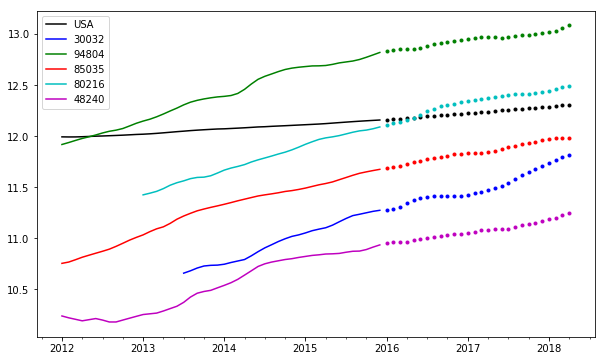

In [31]:
colors = ['b', 'g', 'r', 'c', 'm']

num_top_zipcodes_to_plot = 5

train_df['USA'].mean(axis=1).plot(style="k", label="USA", figsize=(10,6))
test_df['USA'].mean(axis=1).plot(style="k.", label="")
print(country_dict['USA'])
for i in range(num_top_zipcodes_to_plot):
    top_zipcode = sorted_zipcodes[i]
    print(top_zipcode)
    train_df[top_zipcode[0]].plot(style=f"{colors[i]}", label=top_zipcode[0][-1])
    test_df[top_zipcode[0]].plot(style=f"{colors[i]}.", label="")
plt.legend()

$p(t) = p(o)e^{\lambda t}$

$log(p(t))=log\left(p(0)e^{\lambda t}\right)$

$log(p(t))=log\left(p(0)\right)+\log\left(e^{\lambda t}\right)$

$log(p(t))=log\left(p(0)\right)+\lambda t$

## Reproducing results with functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mod4project import *

In [3]:
df = load_and_prepare_zillow_data()

In [4]:
train_df, test_df = perform_train_test_split(df, 
                                             train_start_year = '2012', 
                                             train_end_year = '2015', 
                                             test_start_year = '2016', 
                                             test_end_year = '2018')

In [5]:
country_dict, state_dict, metro_dict, county_dict, city_dict, zipcode_dict = get_level_dicts(train_df)

In [48]:
good_zipcodes = get_good_zipcodes(train_df, 
                                  country_dict, 
                                  state_dict, 
                                  metro_dict, 
                                  county_dict, 
                                  city_dict, 
                                  zipcode_dict, 
                                  pvalue_threshold = 1e-15)

In [49]:
sorted_zipcodes = sort_good_zipcodes(good_zipcodes)

(0.00012944268046901838, 4.186920248763021e-19)
(('USA', 'GA', 'Atlanta', 'Dekalb', 'Candler-Mcafee', '30032'), (0.0007477487134222387, 2.1984511688371532e-29))
(('USA', 'CA', 'San Francisco', 'Contra Costa', 'Richmond', '94804'), (0.000659719979378611, 2.8285732469065117e-44))
(('USA', 'AZ', 'Phoenix', 'Maricopa', 'Phoenix', '85035'), (0.0006503428135877743, 2.5206797719074034e-39))
(('USA', 'CO', 'Denver', 'Denver', 'Denver', '80216'), (0.000643349600292366, 1.265714722934931e-42))
(('USA', 'MI', 'Detroit', 'Wayne', 'Redford', '48240'), (0.0006246286529617295, 9.194616443591105e-32))


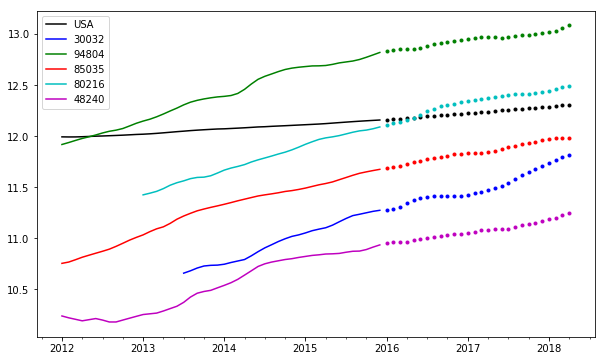

In [56]:
plot_good_zipcodes(train_df, test_df, country_dict, sorted_zipcodes, num_top_zipcodes_to_plot=5)

In [58]:
get_predicted_and_actual_returns(test_df, 
                                 sorted_zipcodes, 
                                 num_zipcodes_to_invest_in=5, 
                                 investment_per_zipcode=1)

30032 0.0007477487134222387 0.0006530600481081758
94804 0.000659719979378611 0.0003004300887591736
85035 0.0006503428135877743 0.00036307916396211633
80216 0.000643349600292366 0.00046950601875943217
48240 0.0006246286529617295 0.00035889249910825156


(3.6379115700042686, 2.149403768690245)

## Checking geographic level checking

In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from mod4project import *

In [61]:
df = load_and_prepare_zillow_data()

In [62]:
train_df, test_df = perform_train_test_split(df, 
                                             train_start_year = '2012', 
                                             train_end_year = '2015', 
                                             test_start_year = '2016', 
                                             test_end_year = '2018')

In [5]:
country_dict, state_dict, metro_dict, county_dict, city_dict, zipcode_dict = get_level_dicts(train_df)

In [63]:
check_levels=[]

In [64]:
good_zipcodes = get_good_zipcodes(train_df, 
                                  country_dict, 
                                  state_dict, 
                                  metro_dict, 
                                  county_dict, 
                                  city_dict, 
                                  zipcode_dict, 
                                  pvalue_threshold = 1e-15,
                                  check_levels=check_levels)

In [65]:
sorted_zipcodes = sort_good_zipcodes(good_zipcodes)

(0.00012944268046901838, 4.186920248763021e-19)
(('USA', 'GA', 'Atlanta', 'Dekalb', 'Candler-Mcafee', '30032'), (0.0007477487134222387, 2.1984511688371532e-29))
(('USA', 'FL', 'Crestview-Fort Walton Beach-Destin', 'Walton', 'Defuniak Springs', '32435'), (0.0007470488501865665, 4.4501576045034756e-11))
(('USA', 'CA', 'San Francisco', 'Contra Costa', 'Richmond', '94804'), (0.000659719979378611, 2.8285732469065117e-44))
(('USA', 'AZ', 'Phoenix', 'Maricopa', 'Phoenix', '85035'), (0.0006503428135877743, 2.5206797719074034e-39))
(('USA', 'CO', 'Denver', 'Denver', 'Denver', '80216'), (0.000643349600292366, 1.265714722934931e-42))


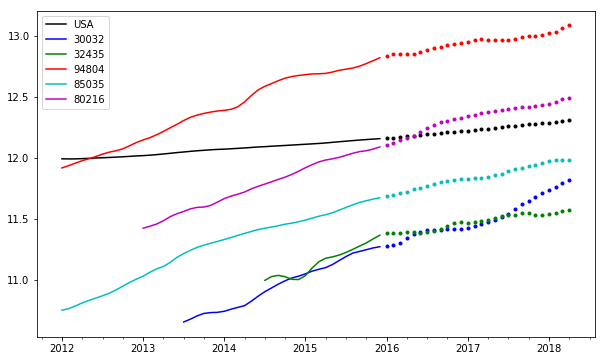

In [68]:
plot_good_zipcodes(train_df, test_df, country_dict, sorted_zipcodes, num_top_zipcodes_to_plot=5)

In [86]:
predicted_return, actual_return = get_predicted_and_actual_returns(test_df, 
                                 sorted_zipcodes, 
                                 num_zipcodes_to_invest_in=5, 
                                 investment_per_zipcode=1)
predicted_return, actual_return

(3.814482325808463, 2.016496992926327)

## Compare to randomly sorted zipcodes

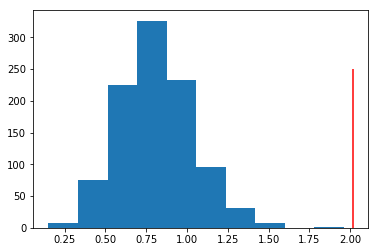

In [89]:
num_shuffles_to_perform = 1000
random_returns = []
for i in range(num_shuffles_to_perform):
    random_zipcodes = list(sorted_zipcodes)
    np.random.shuffle(random_zipcodes)
    predicted_return, random_return = get_predicted_and_actual_returns(test_df, 
                                     random_zipcodes, 
                                     num_zipcodes_to_invest_in=5, 
                                     investment_per_zipcode=1)
    random_returns.append(random_return)
plt.hist(random_returns)
plt.vlines(x=actual_return, ymin=0, ymax=250, color='red')

## Combining more functions together

In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from mod4project import *

In [61]:
df = load_and_prepare_zillow_data()

In [62]:
train_df, test_df = perform_train_test_split(df, 
                                             train_start_year = '2012', 
                                             train_end_year = '2015', 
                                             test_start_year = '2016', 
                                             test_end_year = '2018')

country_dict, state_dict, metro_dict, county_dict, city_dict, zipcode_dict = get_level_dicts(train_df)

check_levels=[]

good_zipcodes = get_good_zipcodes(train_df, 
                                  country_dict, 
                                  state_dict, 
                                  metro_dict, 
                                  county_dict, 
                                  city_dict, 
                                  zipcode_dict, 
                                  pvalue_threshold = 1e-15,
                                  check_levels=check_levels)

sorted_zipcodes = sort_good_zipcodes(good_zipcodes)

plot_good_zipcodes(train_df, test_df, country_dict, sorted_zipcodes, num_top_zipcodes_to_plot=5)

plt.figure()
predicted_return, actual_return = get_predicted_and_actual_returns(test_df, 
                                 sorted_zipcodes, 
                                 num_zipcodes_to_invest_in=5, 
                                 investment_per_zipcode=1)

## Compare to randomly sorted zipcodes

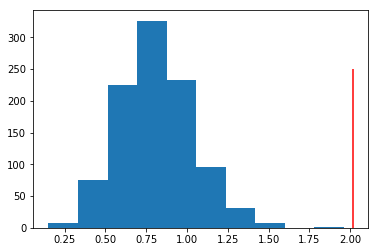

In [89]:
num_shuffles_to_perform = 1000
random_returns = []
for i in range(num_shuffles_to_perform):
    random_zipcodes = list(sorted_zipcodes)
    np.random.shuffle(random_zipcodes)
    predicted_return, random_return = get_predicted_and_actual_returns(test_df, 
                                     random_zipcodes, 
                                     num_zipcodes_to_invest_in=5, 
                                     investment_per_zipcode=1)
    random_returns.append(random_return)
plt.hist(random_returns)
plt.vlines(x=actual_return, ymin=0, ymax=250, color='red')

In [90]:
from mod4project import *

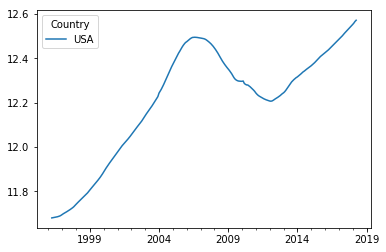

In [86]:
ts = df.groupby('Country').mean().transform(lambda x: np.log(x)).iloc[:,3:].T
ts.index = pd.to_datetime(ts.index)
ts.plot()

(0.00019046499806123695, 7.162713679798731e-83)
(('USA', 'NY', 'New York', 'Suffolk', 'Amagansett', '11930'), (0.0008057905918262354, 3.0964214213805843e-45))
(('USA', 'CA', 'Sacramento', 'Placer', 'Tahoe City', '96146'), (0.0007796312074478244, 1.3894969423916069e-33))
(('USA', 'DE', 'Salisbury', 'Sussex', 'Selbyville', '19975'), (0.000760081809645914, 1.7268092608343898e-45))
(('USA', 'DE', 'Salisbury', 'Sussex', 'Fenwick Island', '19944'), (0.0007248916772657069, 6.021342902913486e-41))
(('USA', 'FL', 'Miami-Fort Lauderdale', 'Broward', 'Fort Lauderdale', '33308'), (0.0007032996635129712, 2.79762794890707e-29))


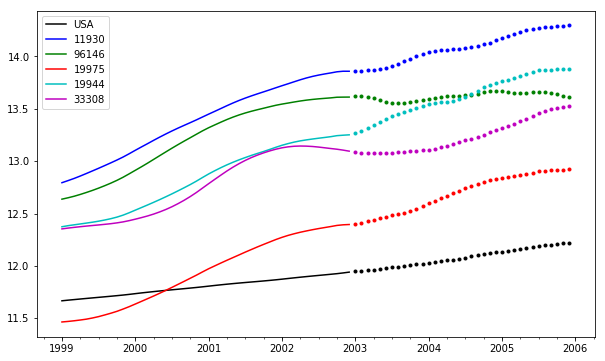

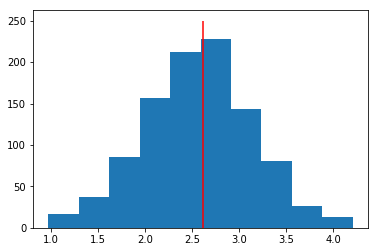

In [104]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=1e-15, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '1999', 
                      train_end_year = '2002', 
                      test_start_year = '2003', 
                      test_end_year = '2005')

(0.0002429981996884996, 2.1057031648840987e-42)
(('USA', 'FL', 'Fort Myers', 'Lee', 'Cape Coral', '33909'), (0.0010190176986255733, 3.2369754549413424e-22))
(('USA', 'HI', 'Hilo', 'Hawaii', 'Pahoa', '96778'), (0.0009439315103731511, 8.374329561066169e-45))
(('USA', 'FL', 'Lake City', 'Columbia', 'Fort White', '32038'), (0.0009412523466622443, 1.2395858688754355e-23))
(('USA', 'HI', 'Hilo', 'Hawaii', 'Naalehu', '96772'), (0.0009390929114350126, 9.21720730833669e-49))
(('USA', 'HI', 'Hilo', 'Hawaii', 'Captain Cook', '96704'), (0.0009308693614159137, 2.4986198847018773e-32))


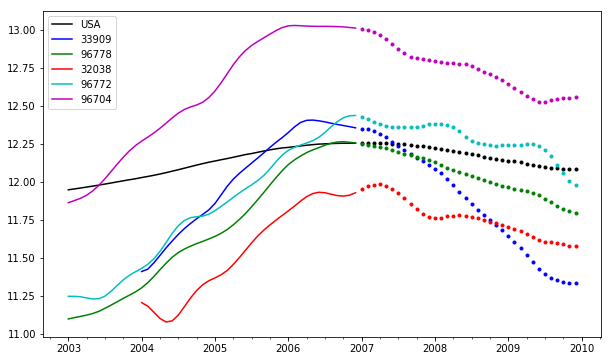

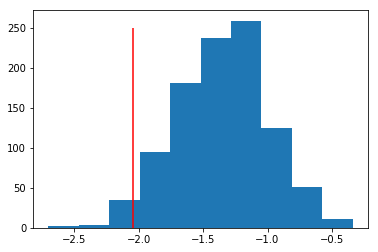

In [102]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=1e-15, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2003', 
                      train_end_year = '2006', 
                      test_start_year = '2007', 
                      test_end_year = '2009')

(-0.00012993085955192323, 3.515800460366691e-19)
(('USA', 'ND', 'Williston', 'Williams', 'Williston', '58801'), (0.00022271405602523344, 2.843616588630676e-30))
(('USA', 'OH', 'Akron', 'Summit', 'Peninsula', '44264'), (0.00020840823940546527, 9.43527198435718e-21))
(('USA', 'ND', 'Bismarck', 'Morton', 'New Salem', '58563'), (0.0001384673589697441, 1.3030476331601302e-17))
(('USA', 'ND', 'Bismarck', 'Burleigh', 'Bismarck', '58504'), (0.00011873317777592396, 8.066786289622108e-18))
(('USA', 'IL', 'Quincy', 'Adams', 'Camp Point', '62320'), (0.00010930062629666958, 1.1275550485140613e-27))
0.9333379795453158 0.9184912100119337


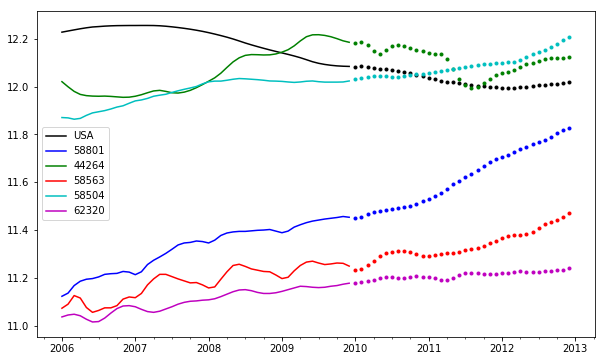

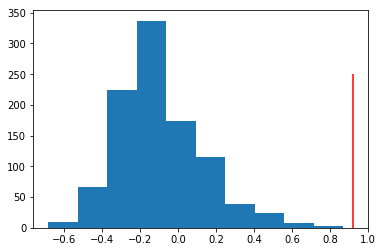

In [105]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=1e-15, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2006', 
                      train_end_year = '2009', 
                      test_start_year = '2010', 
                      test_end_year = '2012')

(0.00012192570889533192, 5.530909883107552e-55)
(('USA', 'CA', 'San Francisco', 'Contra Costa', 'Richmond', '94804'), (0.000659719979378611, 2.8285732469065117e-44))
(('USA', 'AZ', 'Phoenix', 'Maricopa', 'Phoenix', '85035'), (0.0006503428135877743, 2.5206797719074034e-39))
(('USA', 'CO', 'Denver', 'Denver', 'Denver', '80216'), (0.000643349600292366, 1.265714722934931e-42))
(('USA', 'MI', 'Detroit', 'Wayne', 'Redford', '48240'), (0.0006246286529617295, 9.194616443591105e-32))
(('USA', 'CA', 'Vallejo', 'Solano', 'Vallejo', '94590'), (0.000623643742689154, 4.196967959264326e-44))


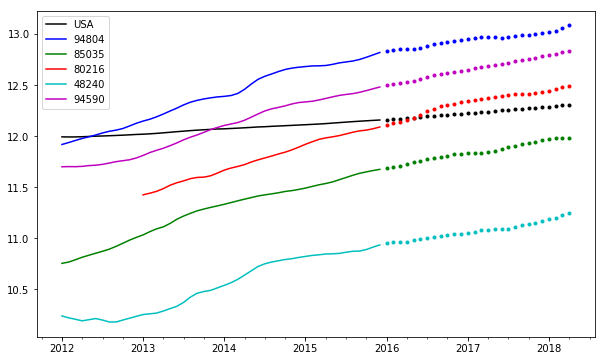

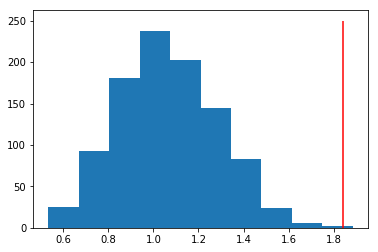

In [103]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=1e-15, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2012', 
                      train_end_year = '2015', 
                      test_start_year = '2016', 
                      test_end_year = '2018')

(0.00016721612198064562, 9.662587250418212e-50)
(('USA', 'FL', 'Tampa', 'Hillsborough', 'Plant City', '33563'), (0.0006692747850306816, 9.536951753886986e-30))
(('USA', 'FL', 'North Port-Sarasota-Bradenton', 'Manatee', 'Bradenton', '34207'), (0.0006352098511646586, 3.3701432753028105e-37))
(('USA', 'SC', 'Greenville', 'Greenville', 'Greenville', '29601'), (0.000633288032541743, 2.5288071062179792e-27))
(('USA', 'FL', 'Jacksonville', 'Duval', 'Jacksonville', '32211'), (0.0006243390965252305, 2.018853179955804e-27))
(('USA', 'FL', 'Tampa', 'Pinellas', 'Saint Petersburg', '33705'), (0.0006159195588722349, 1.5144865526586933e-41))
0.29436907136596524 0.16406371192476277


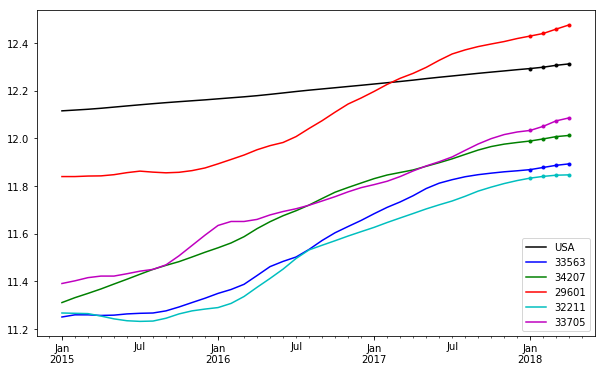

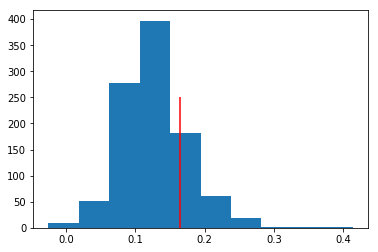

In [106]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=1e-15, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2015', 
                      train_end_year = '2018', 
                      test_start_year = '2018', 
                      test_end_year = '2018')

# Testing more stringent p-value threshold

In [107]:
pvalue_threshold=1e-50

(0.00019046499806123695, 7.162713679798731e-83)
(('USA', 'NJ', 'New York', 'Hudson', 'Jersey City', '7302'), (0.0006282764518153689, 2.3549746784340526e-55))
(('USA', 'NY', 'New York', 'Suffolk', 'Shelter Island', '11964'), (0.0006055124143607951, 3.951500610894549e-54))
(('USA', 'CA', 'Santa Maria-Santa Barbara', 'Santa Barbara', 'Montecito', '93108'), (0.0005826330763873395, 1.5528534602680035e-61))
(('USA', 'MA', 'Cape Cod', 'Barnstable', 'Chatham', '2633'), (0.0005814598330125085, 7.2454365448748595e-56))
(('USA', 'CA', 'San Diego', 'San Diego', 'San Diego', '92104'), (0.0005730167364685602, 1.3537932715577104e-53))
4.416572008524802 2.3270573387019917


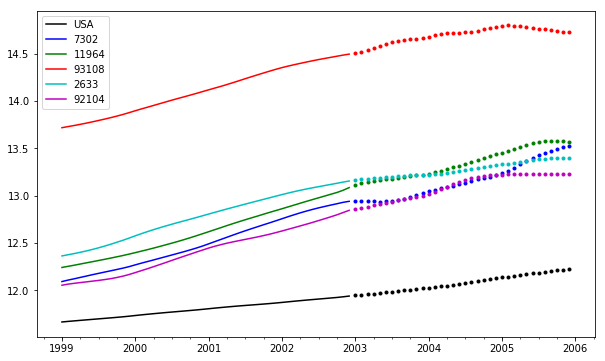

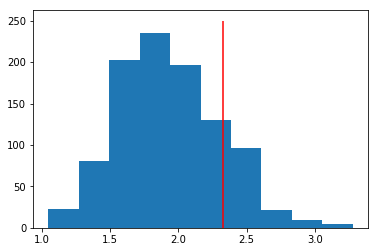

In [108]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=pvalue_threshold, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '1999', 
                      train_end_year = '2002', 
                      test_start_year = '2003', 
                      test_end_year = '2005')

(0.0002429981996884996, 2.1057031648840987e-42)
0 0


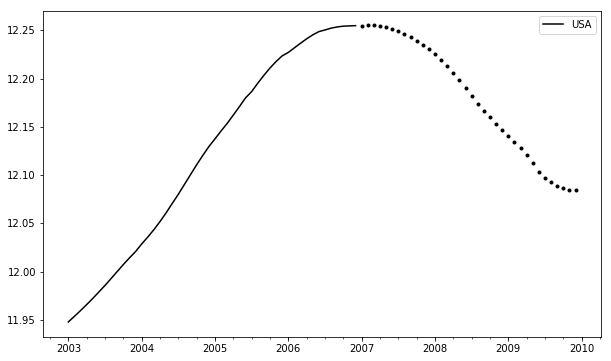

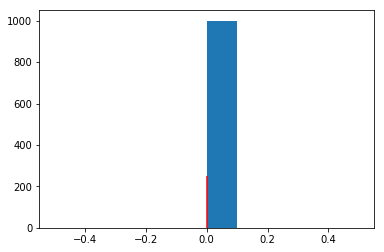

In [112]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=pvalue_threshold, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2003', 
                      train_end_year = '2006', 
                      test_start_year = '2007', 
                      test_end_year = '2009')

(-0.00012993085955192323, 3.515800460366691e-19)
0 0


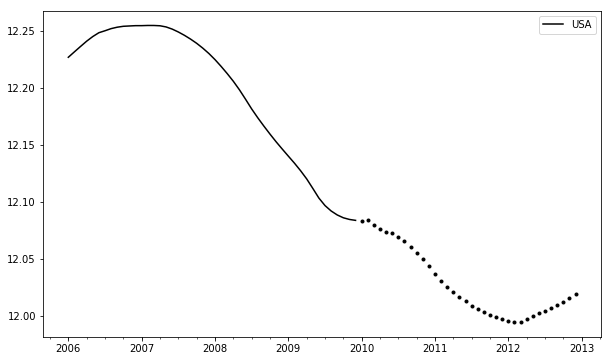

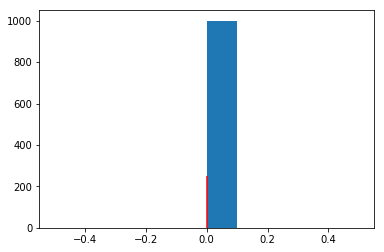

In [113]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=pvalue_threshold, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2006', 
                      train_end_year = '2009', 
                      test_start_year = '2010', 
                      test_end_year = '2012')

(0.00012192570889533192, 5.530909883107552e-55)
(('USA', 'ND', 'Williston', 'Williams', 'Williston', '58801'), (0.00038627156837523955, 2.9261721711405733e-69))
(('USA', 'DC', 'Washington', 'District of Columbia', 'Washington', '20002'), (0.0003254839254947157, 3.1168640411182564e-55))
(('USA', 'DC', 'Washington', 'District of Columbia', 'Washington', '20003'), (0.00016794545096202908, 4.729294773257641e-55))
0.8273519496546848 0.3748790124326764


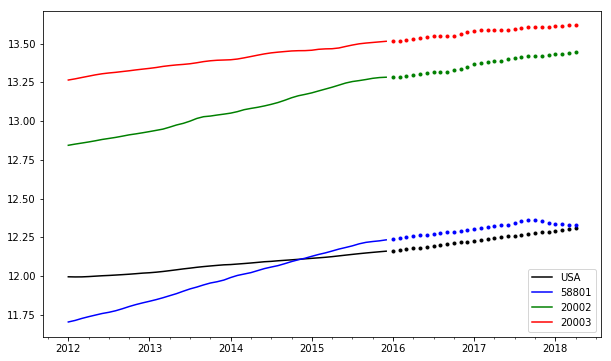

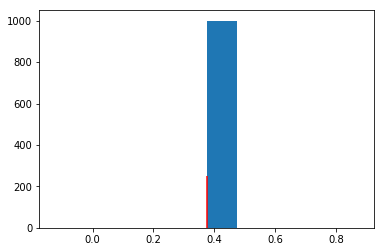

In [114]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=pvalue_threshold, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2012', 
                      train_end_year = '2015', 
                      test_start_year = '2016', 
                      test_end_year = '2018')

(0.00016721612198064562, 9.662587250418212e-50)
(('USA', 'WA', 'Seattle', 'King', 'Shoreline', '98133'), (0.00045036049780557315, 1.2769157778948384e-60))
(('USA', 'WA', 'Seattle', 'King', 'Seattle', '98126'), (0.0004296561710645237, 2.157091910272494e-53))
(('USA', 'WA', 'Seattle', 'King', 'Seattle', '98125'), (0.00041279066253820866, 5.176092781204935e-57))
(('USA', 'WA', 'Seattle', 'King', 'Medina', '98039'), (0.0003669700649394209, 6.499514019375846e-51))
(('USA', 'WA', 'Seattle', 'King', 'Des Moines', '98198'), (0.0003652741698894754, 5.717742299521237e-53))
0.18564119971056914 0.11264608516291696


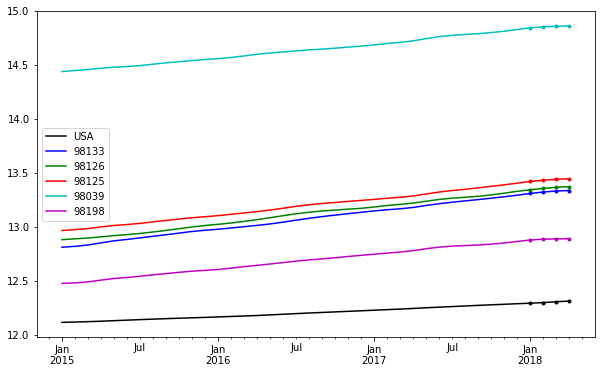

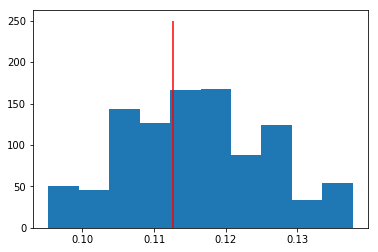

In [115]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=pvalue_threshold, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2015', 
                      train_end_year = '2018', 
                      test_start_year = '2018', 
                      test_end_year = '2018')

# Fixing random zipcode picking

In [116]:
pvalue_threshold=1e-50

(0.00019046499806123695, 7.162713679798731e-83)
(('USA', 'NJ', 'New York', 'Hudson', 'Jersey City', '7302'), (0.0006282764518153689, 2.3549746784340526e-55))
(('USA', 'NY', 'New York', 'Suffolk', 'Shelter Island', '11964'), (0.0006055124143607951, 3.951500610894549e-54))
(('USA', 'CA', 'Santa Maria-Santa Barbara', 'Santa Barbara', 'Montecito', '93108'), (0.0005826330763873395, 1.5528534602680035e-61))
(('USA', 'MA', 'Cape Cod', 'Barnstable', 'Chatham', '2633'), (0.0005814598330125085, 7.2454365448748595e-56))
(('USA', 'CA', 'San Diego', 'San Diego', 'San Diego', '92104'), (0.0005730167364685602, 1.3537932715577104e-53))
4.416572008524802 2.3270573387019917


TypeError: ufunc 'exp' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

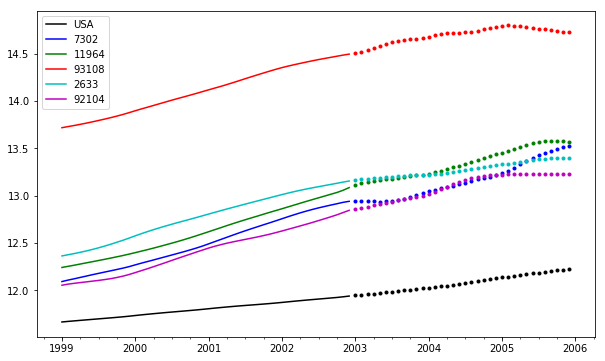

<Figure size 432x288 with 0 Axes>

In [118]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=pvalue_threshold, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '1999', 
                      train_end_year = '2002', 
                      test_start_year = '2003', 
                      test_end_year = '2005')

In [ ]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=pvalue_threshold, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2003', 
                      train_end_year = '2006', 
                      test_start_year = '2007', 
                      test_end_year = '2009')

In [ ]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=pvalue_threshold, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2006', 
                      train_end_year = '2009', 
                      test_start_year = '2010', 
                      test_end_year = '2012')

In [ ]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=pvalue_threshold, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2012', 
                      train_end_year = '2015', 
                      test_start_year = '2016', 
                      test_end_year = '2018')

In [ ]:
test_train_test_years(df, 
                      check_levels=["State", "Metro", "County", "City", "Zipcode"], 
                      pvalue_threshold=pvalue_threshold, 
                      num_zipcodes_to_invest_in=5, 
                      investment_per_zipcode=1, 
                      train_start_year = '2015', 
                      train_end_year = '2018', 
                      test_start_year = '2018', 
                      test_end_year = '2018')

# Trying an r-squared threshold